In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_stata("work_hours_dat/data_pub.dta")
df.head()

,country,year,H,HE,e,w,h,H_m,HE_m,e_m,...,e_high,h_high,HE_high,H_high,h_agr,HE_agr,h_ind,HE_ind,h_ser,HE_ser
0,at,1983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,at,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,at,1985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,at,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,at,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


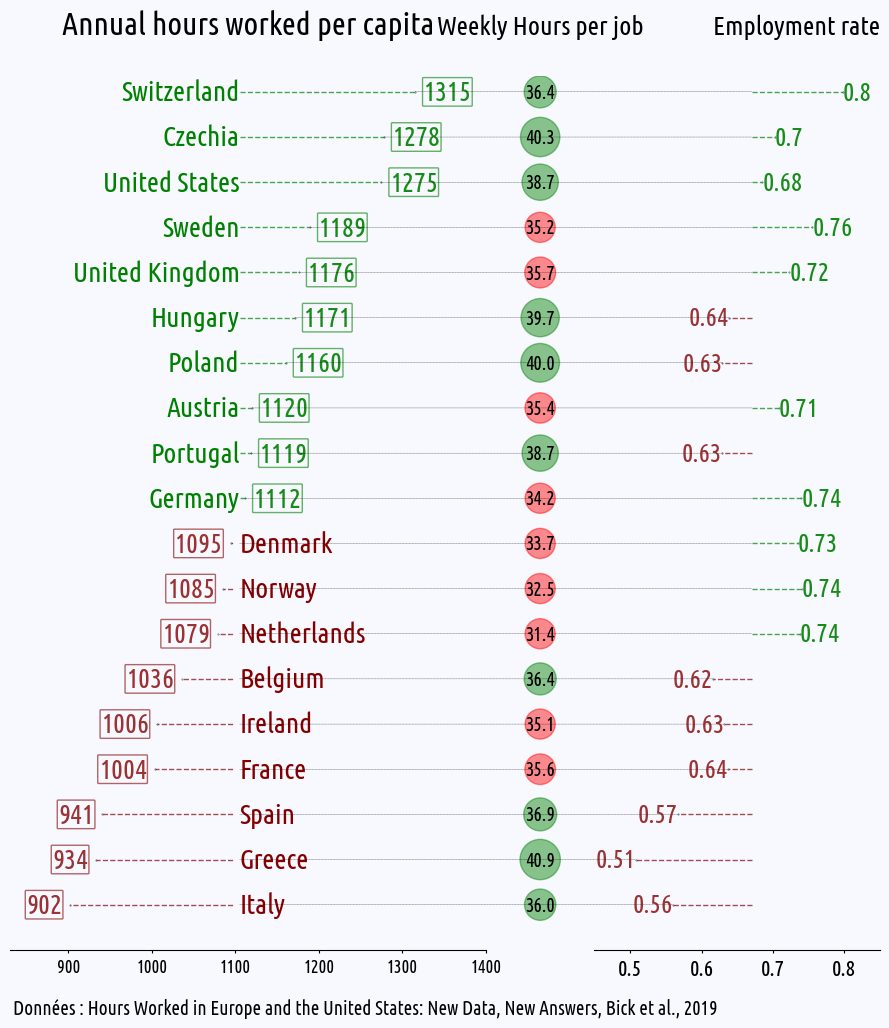

In [175]:
from matplotlib.patches import ConnectionPatch

data = df[df["year"] == 2015]

data = data.sort_values("H")

y = data["country"]
country = pd.read_html("https://fr.wikipedia.org/wiki/ISO_3166")[0][[2,0]]
country.columns = ["code","name"]
name_dict = country.set_index("code").to_dict("index")
name_dict["AF"]["name"]
y = y.apply(lambda x : name_dict[x.upper()]["name"] if x.upper() in name_dict else x).reset_index(drop=True)
y.iloc[14] = "United Kingdom"
y.iloc[16] = "United States"
y.iloc[6] = "Netherlands"

countries = y.copy()
x = data["H"]
mean = round(data["H"].mean())

plt.style.use("rirO")

fig, (ax,ax3,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(9,10),gridspec_kw={'width_ratios': [2.5,0.25,1.5]})

#ax1
left = data["H"].apply(lambda x :max(x, data["H"].mean()))
right = data["e"].apply(lambda x :min(x, data["e"].mean()))
for country,left,right in zip(range(len(data)+3),left,right):
    
    con = ConnectionPatch(xyA=(left, country), xyB=(right,country),coordsA="data",coordsB="data",axesA=ax, axesB=ax2,zorder=0,linewidth=0.2,linestyle="--")
    ax2.add_artist(con)


ax.scatter(x,y,s=0.1)
for x,y in zip(x,y):
        
    if x > mean :
        props = dict(facecolor='none', edgecolor='green', pad=0.03,boxstyle='round',alpha=0.6)
        ax.text(x + 10,y,round(x), fontsize=20,va="center",color="green",alpha=0.9,backgroundcolor="#F7F9FF",zorder=3,bbox=props)
        ax.text(mean,y,y,ha="right",va="center",color="green",fontsize=20)
        ax.hlines(y=y,xmin=mean,xmax=x,linewidth=1,alpha=0.7,linestyle="--",color="green")
    else:
        props = dict(facecolor='none', edgecolor='#840000', pad=0.03,boxstyle='round',alpha=0.6)
        ax.text(x - 10,y,round(x), fontsize=20,va="center",ha="right",color="#840000",alpha=0.8,bbox=props)
        ax.text(mean,y,y,ha="left",va="center",color="#840000",fontsize=20,backgroundcolor="#F7F9FF")
        ax.hlines(y=y,xmin=mean,xmax=x,linewidth=1,alpha=0.7,linestyle="--",color="#840000")

title = "Annual hours worked per capita"
ax.set_title(label=title,pad=30,loc="center",fontsize=23)
ax.set(xlim= (830,1400),ylim=-1)

ax.tick_params(which='major', labelsize=13,labelleft=False)

#ax2
sns.despine(ax=ax2,left=True)
ax2.tick_params(labelleft=False)

y = countries
x = data["e"]
mean= x.mean()
ax2.scatter(x,y,s=0.1)
for x,y in zip(x,y):
    if x > mean :
        ax2.text(x,y,round(x,2), fontsize=19,va="center",color="green",alpha=0.9)

        ax2.hlines(y=y,xmin=mean,xmax=x,linewidth=1,alpha=0.7,linestyle="--",color="green")
    else:
        ax2.text(x,y,round(x,2), fontsize=19,va="center",ha="right",color="#840000",alpha=0.8)

        ax2.hlines(y=y,xmin=mean,xmax=x,linewidth=1,alpha=0.7,linestyle="--",color="#840000")
ax2.set_title("Employment rate",pad=30,loc="right",fontsize=19)
ax2.set_ylim(-1)
ax2.set_xlim(0.45,0.85)

x = data["h"]
y = countries
mean = x.median()
s = (x**4)/3300
s = np.where(s<470,470,s)


colors = np.where(x >=mean,"green","red")
sns.despine(ax=ax3,left=True,bottom=True,trim=True)
ax3.tick_params(labelleft=False,labelbottom=False)

ax3.scatter([0.5]*len(data),y,s=s,alpha=0.45,color=colors)
for x,y in zip(x,y):    
    ax3.text(0.5,y,round(x,1),va="center",ha="center",fontsize=14)
ax3.set_ylim(-1)
ax3.set_xlim(0.490,0.510)
ax3.set_title("Weekly Hours per job",loc="center",pad=30,fontsize=19)

text = "Données : Hours Worked in Europe and the United States: New Data, New Answers, Bick et al., 2019"

fig.text(0.02,-0.02, text,fontsize=14)

fig.savefig("employment.svg",bbox_inches="tight")


/home/riri/miniconda3/envs/base_data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


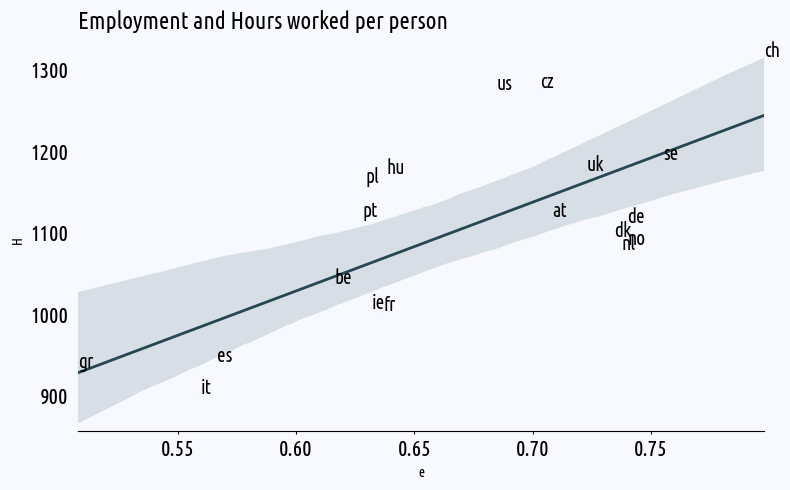

In [289]:
x = data["e"]
y= data["H"]
label = data["country"]
with plt.style.context("rirO"):
    sns.regplot(x,y,scatter_kws={'s':0.001},line_kws={'linewidth':2})
    plt.title("Employment and Hours worked per person")
    for x,y,label in zip(x,y,label):
        plt.text(x,y,label,fontsize=14)
    

/home/riri/miniconda3/envs/base_data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


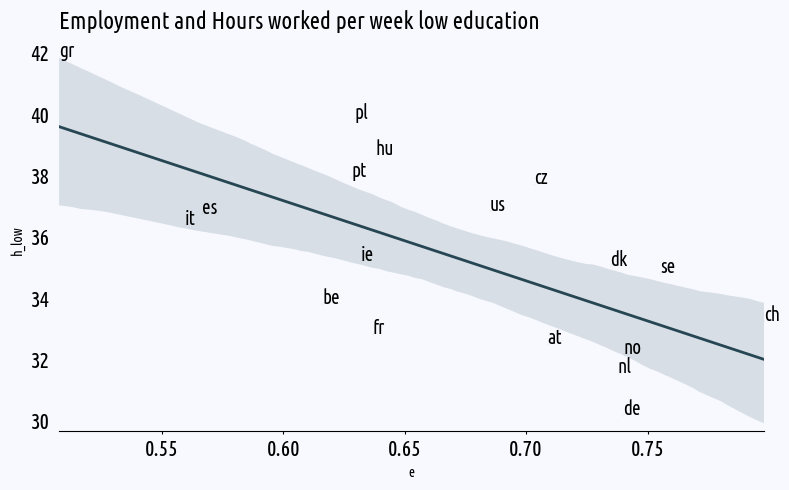

In [350]:
x = data["e"]
y= data["h_low"]
label = data["country"]
with plt.style.context("rirO"):
    sns.regplot(x,y,scatter_kws={'s':0.001},line_kws={'linewidth':2})
    plt.title("Employment and Hours worked per week low education")
    for x,y,label in zip(x,y,label):
        plt.text(x,y,label,fontsize=14)
    

27.024988
8.804841
8.5448
7.5553193


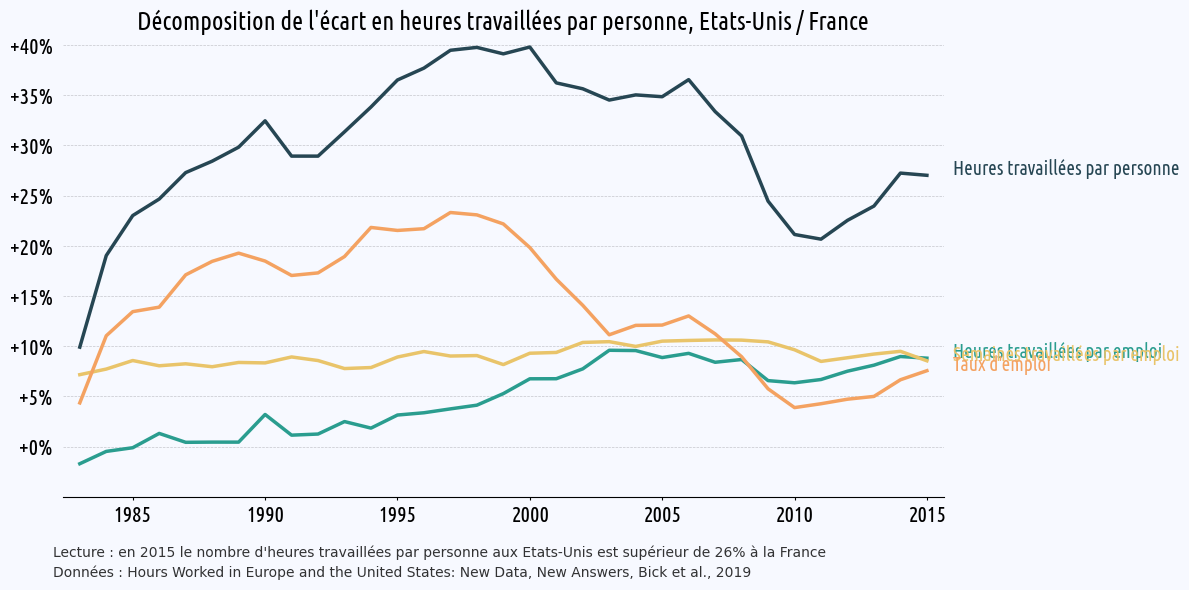

In [147]:
country1 = "fr"
country2 = "us"
country_mask = df["country"].isin([country1,country2])

with plt.style.context("rirO"):
    plt.figure(figsize=(12,6))
    for indicator,label in zip(["H","h","w","e"],["Heures travaillées par personne","Heures travaillées par emploi","Semaines travaillées par emploi","Taux d'emploi"]):
        data = df[country_mask]


        
        data = data.set_index(["year","country"]).unstack()[indicator]
        data["diff"] = ((data[country2]-data[country1])/data[country1]*100)


        ligne = plt.plot(data.index,data["diff"])
        x = 2016
        y = data.iloc[-1,2]
        print(y)
        color= ligne[0].get_color()
        plt.text(x,y,label,color=color,fontsize=14)

l = [""]
l2 = ["+"+str(i)+"%" for i in range(0,45,5)]
l= l + l2
plt.yticks(range(-5,45,5),l)

text = "Lecture : en 2015 le nombre d'heures travaillées par personne aux Etats-Unis est supérieur de 26% à la France"
plt.text(1982,-11,text,alpha=0.8)
text = "Données : Hours Worked in Europe and the United States: New Data, New Answers, Bick et al., 2019"
plt.text(1982,-13,text,alpha=0.8)
plt.title("Décomposition de l'écart en heures travaillées par personne, Etats-Unis / France",fontsize=18)
plt.savefig("us_fr.svg")

10.759178
-3.7883286
-0.9236503
16.193535


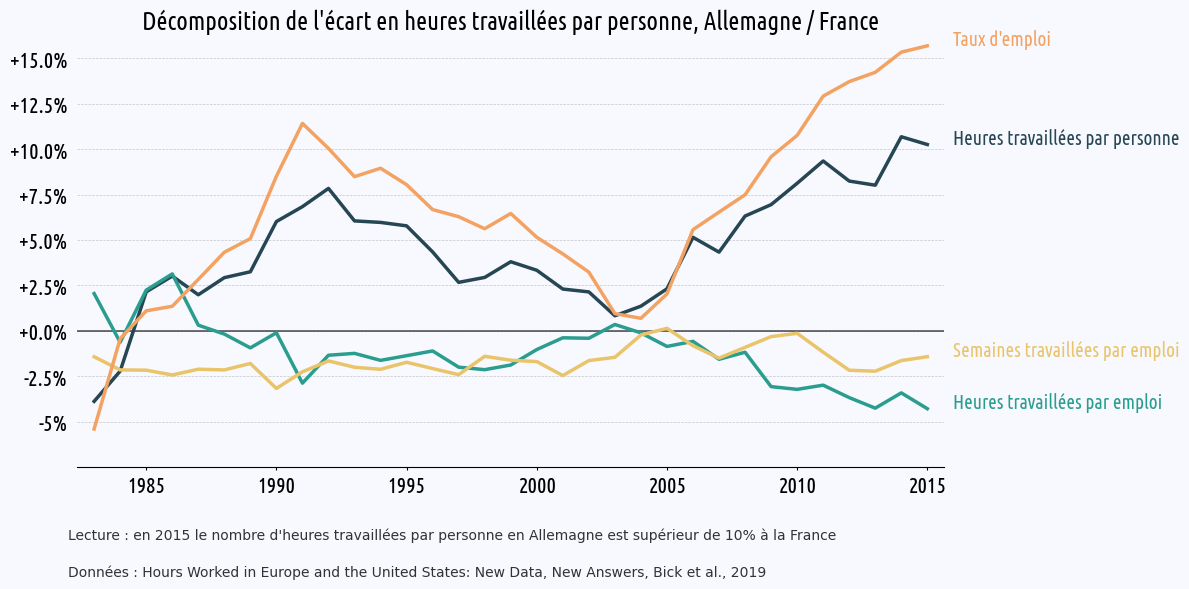

In [174]:
datacountry1 = "fr"
country2 = "de"
country_mask = df["country"].isin([country1,country2])

with plt.style.context("rirO"):
    plt.figure(figsize=(12,6))
    for indicator,label in zip(["H","h","w","e"],["Heures travaillées par personne","Heures travaillées par emploi","Semaines travaillées par emploi","Taux d'emploi"]):
        data = df[country_mask]


        
        data = data.set_index(["year","country"]).unstack()[indicator]
        data["diff"] = ((data[country2]-data[country1])/data[country1]*100)


        ligne = plt.plot(data.index,data["diff"])
        x = 2016
        y = data.iloc[-1,2]
        print(y)
        color= ligne[0].get_color()
        plt.text(x,y,label,color=color,fontsize=14)

l = ["","-5%",'-2.5%']
l2 = ["+"+str(i)+"%" for i in np.arange(0,17,2.5)]
l= l + l2
plt.yticks(np.arange(-7,17,2.5),l)

text = "Lecture : en 2015 le nombre d'heures travaillées par personne en Allemagne est supérieur de 10% à la France"
plt.text(1982,-11,text,alpha=0.8)
text = "Données : Hours Worked in Europe and the United States: New Data, New Answers, Bick et al., 2019"
plt.text(1982,-13,text,alpha=0.8)
plt.title("Décomposition de l'écart en heures travaillées par personne, Allemagne / France",fontsize=18)
plt.axhline(0.5,color="black",alpha=0.6,zorder=0, linewidth=1.3)
plt.savefig("de_fr.svg")

17.184715
0.42859828
2.821301
13.482916


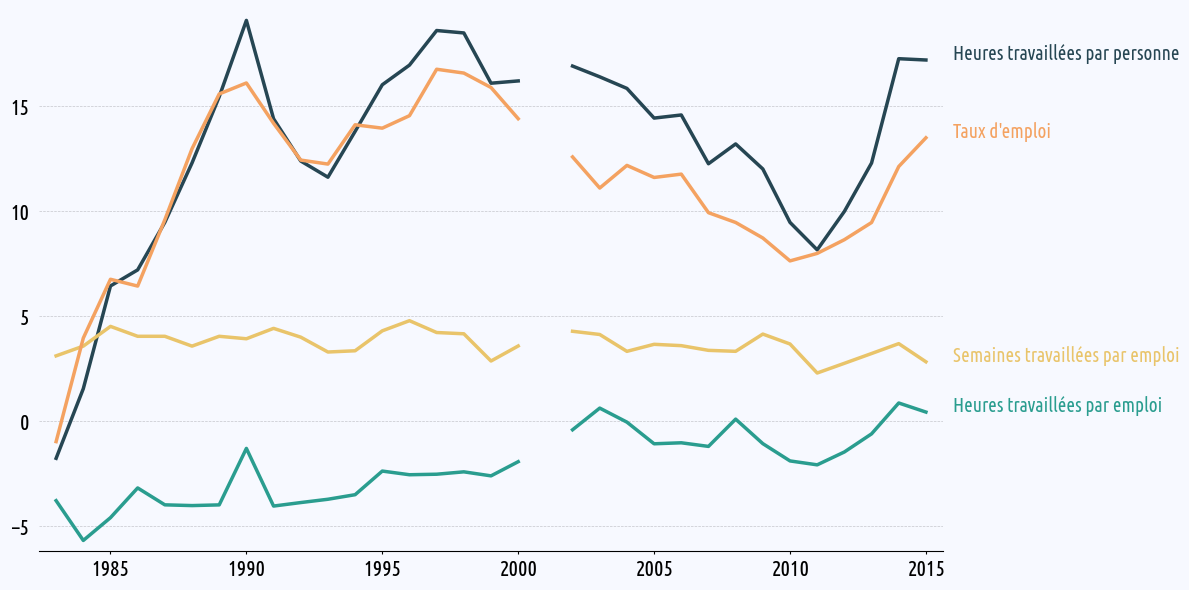

In [310]:
country1 = "fr"
country2 = "uk"
country_mask = df["country"].isin([country1,country2])

with plt.style.context("rirO"):
    plt.figure(figsize=(12,6))
    for indicator,label in zip(["H","h","w","e"],["Heures travaillées par personne","Heures travaillées par emploi","Semaines travaillées par emploi","Taux d'emploi"]):
        data = df[country_mask]


        
        data = data.set_index(["year","country"]).unstack()[indicator]
        data["diff"] = ((data[country2]-data[country1])/data[country1]*100)


        ligne = plt.plot(data.index,data["diff"])
        x = 2016
        y = data.iloc[-1,2]
        print(y)
        color= ligne[0].get_color()
        plt.text(x,y,label,color=color,fontsize=14)


In [414]:
data = df[(df["year"] == 2015) & (df["country"].isin(["fr","de"]))]
data = data.set_index("country").transpose()

H_diff = (data.loc["H","de"]-data.loc["H","fr"])/data.loc["H","fr"]
H1524_diff = (data.loc["H_1524","de"]-data.loc["H_1524","fr"])/data.loc["H_1524","fr"]
H2554_diff = (data.loc["H_2554","de"]-data.loc["H_2554","fr"])/data.loc["H_2554","fr"]
H5564_diff = (data.loc["H_5564","de"]-data.loc["H_5564","fr"])/data.loc["H_5564","fr"]

e1524_diff = (data.loc["e_1524","de"]-data.loc["e_1524","fr"])/data.loc["e_1524","fr"]


In [415]:
t_15 = 0.1
t_24 = 0.3987
t_54 = 0.15
tot = (t_15+t_24+t_54)
s15 = t_15/tot
s24 = t_24/tot
s54 = t_54/tot
print(s15,s24,s54)
data.loc["H_1524","de"]*s15 + data.loc["H_2554","de"]*s24 + data.loc["H_5564","de"]*s54

0.15415446277169723 0.6146138430707568 0.23123169415754583


1106.5812857874703

In [419]:
((H1524_diff*s15) + (H2554_diff*s24) + (H5564_diff*s54))

0.16780526377303756

In [416]:
((H5564_diff*s54) + (H1524_diff*s15)) / ((H1524_diff*s15) + (H2554_diff*s24) + (H5564_diff*s54))

0.9578341364098506